# Taller 4
- Daniela Martínez Quiroga
- María Isabella Rodríguez Arévalo


## Ejercicio 1

### Cargar Librerías



In [ ]:
!pip install -U ydata-profiling
!pip install gradio

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c246bd1192aeb5d87a457a9e029d3ba800cf5810c35a906b111233a3ecd3a1a3
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
import numpy as np

from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

### Cargar Base de Datos y Reporte




In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')
profile = ProfileReport(df, title="Profiling Report")
profile

Output hidden; open in https://colab.research.google.com to view.

### Limpieza de datos
Se eliminan los valores nulos y las variables categóricas

In [ ]:
#Variables de tipo numérico.
df_limpio = df.select_dtypes(include=['number'])
df_limpio = df_limpio.drop('PassengerId', axis=1)

#Eliminando valores nulos
df_limpio.fillna(df_limpio.mean(), inplace=True)
df_limpio

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


### Datos de entrenamiento y prueba


In [ ]:
#Separar X y Y
y = df_limpio['Survived']
x = df_limpio.drop('Survived', axis=1)

#Separar train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify = y)

### Modelos SVC

Se van a entrenar 6 modelos donde se cambie:
- kernel
  - linear
  - poly: polinómica
  - sigmoid: sigmoidea
  - rbf: función radial base
  - precomputada no se puede usar al no ser una matriz cuadrada
- degree (se usa solo con kernel = 'poly')
  - Se usa el grado 2 para disminuir el tiempo de ejecución
- gamma

In [ ]:
svm_op1 = SVC(kernel='linear')
svm_op2 = SVC(kernel='poly', degree=2, gamma='scale')
svm_op3 = SVC(kernel='poly', degree=2, gamma='auto')
svm_op4 = SVC(kernel='sigmoid', gamma='scale')
svm_op5 = SVC(kernel='rbf', gamma='auto')

svm_op1.fit(x_train, y_train)
svm_op2.fit(x_train, y_train)
svm_op3.fit(x_train, y_train)
svm_op4.fit(x_train, y_train)
svm_op5.fit(x_train, y_train)


SVC(gamma='auto')

Ahora con los datos de prueba se eligirá el mejor modelo según Accuracy

In [ ]:
y_pred = svm_op1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo 1: {accuracy_score(y_test, y_pred)}")

y_pred = svm_op2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo 1: {accuracy_score(y_test, y_pred)}")

y_pred = svm_op3.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo 1: {accuracy_score(y_test, y_pred)}")

y_pred = svm_op4.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo 1: {accuracy_score(y_test, y_pred)}")

y_pred = svm_op5.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo 1: {accuracy_score(y_test, y_pred)}")

Exactitud del modelo 1: 0.667910447761194
Exactitud del modelo 1: 0.6492537313432836
Exactitud del modelo 1: 0.6716417910447762
Exactitud del modelo 1: 0.5634328358208955
Exactitud del modelo 1: 0.6529850746268657


El mejor modelo SVC fue el primero, que tiene el valor de kernel como 'linear'. Ahora, comparando la regresión logística, el árbol de decisión y el SVM, se obtiene la siguiente tabla, que evidencia que el modelo con mejor Accuracy es el del árbol de decisión:


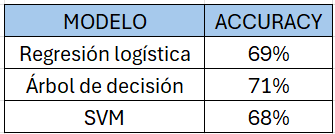


# Interfaz con Gradio

## Modelos anteriores

In [ ]:
# Modelo de regresión logística.
modelo = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, l1_ratio=0.5)
modelo.fit(x_train, y_train)

#Modelo de árbol de decisión
arbol_t1 = DecisionTreeRegressor(criterion='squared_error', max_depth=5, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.000003, min_samples_leaf=2, min_samples_split=20)
arbol_t1.fit(x_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


DecisionTreeRegressor(max_depth=5, max_features='log2',
                      min_impurity_decrease=3e-06, min_samples_leaf=2,
                      min_samples_split=20)

## Interfaz completa

In [ ]:
def predecir(modelo_seleccionado, pclass, age, sibsp, parch, fare):
    input_array = np.array([[pclass, age, sibsp, parch, fare]])

    if modelo_seleccionado == "Árbol de Decisión":
        result = arbol_t1.predict(input_array)
        return f"Probabilidad de sobrevivir: {result[0]:.2f}"

    elif modelo_seleccionado == "Regresión Logística":
        result = modelo.predict(input_array)
        return f"Probabilidad de sobrevivir: {result[0]:.2f}"

    elif modelo_seleccionado == "SVM":
        result = svm_op1.predict(input_array)
        return f"Probabilidad de sobrevivir: {result[0]:.2f}"

    else:
        result = "Modelo no válido"

    return result

# Interfaz en Gradio
with gr.Blocks(css=".gradio-container {background-color: #f99abc;}") as interfaz:
    gr.Markdown("<h1 style='text-align: center; color: #d63384;'> Probabilidad de supervivencia en el Titanic </h1>")

    with gr.Column():
        modelo_seleccionado = gr.Dropdown(["Regresión Logística", "Árbol de Decisión", "SVM"],
                                          label="Selecciona el modelo")
        with gr.Row():
            input_1 = gr.Dropdown([1, 2, 3], label="Pclass")
            input_2 = gr.Number(label="Edad")
        with gr.Row():
            input_3 = gr.Number(label="Número de hermanos abordo (SibSp)")
            input_4 = gr.Slider(0, 5, step=1, label="Número de familiares abordo (Parch)")
        with gr.Row():
            input_5 = gr.Number(label="Tarifa del billete (Fare)")

        btn = gr.Button("Predecir")

        output = gr.Textbox(label="Sobrevive o no")

    btn.click(fn=predecir, inputs=[modelo_seleccionado, input_1, input_2, input_3, input_4, input_5], outputs=output)

if __name__ == "__main__":
    interfaz.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://89e3af9655171bf8e3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
